In [3]:
!python -m spacy download fr_core_news_sm

# The fr_core_news_sm is downloaded 

     -------------------------------------- 16.3/16.3 MB 694.5 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


# Now we have loaded spacy and textblob to do sentiment analysis

In [70]:
import os
import spacy
from textblob import TextBlob

# Load the French language model in spaCy
nlp = spacy.load('fr_core_news_sm')

In [71]:
#1. The analyze sentiment function first load the file through its paramete, Tokenize the article using spaCy,
#2. the extracts sentences from the article.
#3. Then it performs sentiment analysis for each sentence in our article by using textblob library
#4. Them it calculates overall sentiment score by takng mean of all sentiments
#5. Then it returns sentiments as per the criteria:  
#     if overall_sentiment_score < 0:
#         return 'negative'
#     elif overall_sentiment_score == 0:
#         return 'neutral'
#     else:
#         return 'positive'

In [187]:
# Variable to store each articles and its sentiments
Articles_Sentiments = []
Articles = []

In [188]:
def analyze_sentiment(article):
    # Tokenize the article using spaCy
    doc = nlp(article)
    Articles.append(doc)
    
    # Extract sentences from the article
    sentences = [sent.text for sent in doc.sents]
    
    # Perform sentiment analysis on each sentence using TextBlob
    sentiment_scores = []
    for sentence in sentences:
        blob = TextBlob(sentence.lower())
        sentiment_scores.append(blob.sentiment.polarity)
    
    # Calculate the overall sentiment score of the article
    overall_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
    
    if overall_sentiment_score < 0:
        Articles_Sentiments.append("negative")
        return 'negative'
    elif overall_sentiment_score == 0:
        Articles_Sentiments.append("neutral")
        return 'neutral'
    else:
        Articles_Sentiments.append("positive")
        return 'positive'

In [189]:
# Folder path where articles are saved
folder_path = 'articles_txt/'

In [190]:
# checking
folder_path

'articles_txt/'

In [191]:
# Create a file to store the sentiment scores
output_file = 'sentiment_scores.txt'

In [192]:
# These variables stores the count of sentiment, either it is positive, negative or neutral
negative = 0
positive = 0
neutral = 0

# Here sentiment is calculated for each articles  

In [193]:
#1. First it loads the folder path and selects each file which is txt
#2. The loaded file is then provided to analyze_sentiment function which will generate the sentiment
#3. After the sentiment is calculated, the sentiment is being added to their variables for the count
#4. Last step is to write each articles sentiment in a file with the article name 

In [194]:
# Open the output file in write mode
with open(output_file, 'w', encoding='utf-8') as file:
    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the content of the article
            with open(file_path, 'r', encoding='utf-8') as article_file:
                article_text = article_file.read()
            
            # Perform sentiment analysis on the article
            sentiment_score = analyze_sentiment(article_text)
            
            if sentiment_score == "positive":
                positive += 1
            elif sentiment_score == "negative":
                negative += 1
            else:
                neutral += 1
            
            # Write the filename and sentiment score to the output file
            file.write("File: " + filename + "\n")
            file.write("Sentiment Score: " + str(sentiment_score) + "\n")
            file.write("--------------------------------------\n")

# Print a message indicating the sentiment scores are saved
print("Sentiment scores saved to", output_file)

Sentiment scores saved to sentiment_scores.txt


In [195]:
# Chechking the count of posiitive, negative and neutral sentiments

In [196]:
positive

96

In [197]:
negative

23

In [198]:
neutral

31

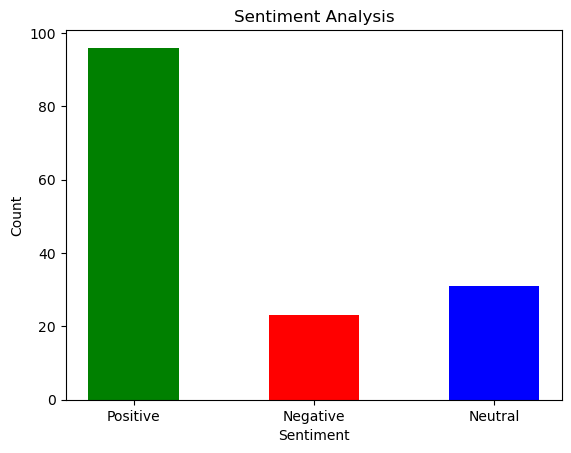

In [199]:
# Importing Matplotlib
import matplotlib.pyplot as plt

# Our sentiments
categories = ['Positive', 'Negative', 'Neutral']
values = [positiv, negative, neutral]

# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(categories))

# Create the bar chart
plt.bar(bar_positions, values, color=['green', 'red', 'blue'], width=bar_width)

# Customize the chart
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.xticks(bar_positions, categories)

# Show the chart
plt.show()


In [200]:
# Checking our artcles aand score

Articles[0]

Biens et services miniers au Burkina : Une troisième journée pour encourager les acteurs locaux
Accueil > Actualités > DOSSIERS > Mines, mineurs, miniers, énergie •  • lundi 4 octobre 2021 à 19h31min
L’agence Burkina networking, en collaboration avec la Chambre des mines du Burkina, organisent les 4 et 5 octobre 2021 à Bobo-Dioulasso, la troisième édition des Journées promotionnelles sur la fourniture locale des biens et services miniers.
Débutées le lundi 4 octobre 2021, ces journées ont pour thème « Fourniture de biens et services miniers : quel mécanisme pour une meilleure compétitivité des fournisseurs locaux ? »
Elles ont pour objectif de sensibiliser et de renforcer les capacités des acteurs économiques locaux en vue de stimuler l’approvisionnement local en biens et services miniers dans la région du grand Ouest.
Les participants
Elles visent par ailleurs à offrir un cadre de réflexion et de partage d’expériences sur les initiatives de promotion des achats locaux dans le secteur 

In [201]:
len(Articles)

150

In [202]:
Articles_Sentiments[0]

'positive'

In [203]:
# Creating dataframe which will take Artcles and its sentiment
import pandas as pd
df = pd.DataFrame()

In [204]:
df['Articles'] = Articles

In [205]:
df.head()

,Articles
0,"(Biens, et, services, miniers, au, Burkina, :,..."
1,"(Biens, et, services, miniers, au, Burkina, :,..."
2,"(Biens, et, services, miniers, au, Burkina, :,..."
3,"(Burkina, /, Gestion, du, fonds, minier, dans,..."
4,"(Burkina, /, Gestion, du, fonds, minier, dans,..."


In [206]:
df['Sentiments'] = Articles_Sentiments

In [207]:
df.head()

,Articles,Sentiments
0,"(Biens, et, services, miniers, au, Burkina, :,...",positive
1,"(Biens, et, services, miniers, au, Burkina, :,...",positive
2,"(Biens, et, services, miniers, au, Burkina, :,...",positive
3,"(Burkina, /, Gestion, du, fonds, minier, dans,...",positive
4,"(Burkina, /, Gestion, du, fonds, minier, dans,...",positive


In [208]:
df.Sentiments.value_counts()

positive    96
neutral     31
negative    23
Name: Sentiments, dtype: int64

# Balancing the dataset 

In [209]:
#Balancing the dataset

# Get the class labels
labels = df['Sentiments'].unique()

# Find the maximum number of samples for any class
max_samples = df['Sentiments'].value_counts().max()

# Create an empty DataFrame to hold the balanced data
balanced_df = pd.DataFrame()

# For each class, sample the data to have the same number of samples as the class with the maximum number of samples
for label in labels:
    class_df = df[df['Sentiments'] == label]
    num_samples = len(class_df)
    if num_samples < max_samples:
        # If the class has fewer samples than the maximum, sample with replacement to match the maximum
        sample_df = class_df.sample(n=max_samples, replace=True)
    else:
        # Otherwise, just sample the maximum number of samples without replacement
        sample_df = class_df.sample(n=max_samples)
    balanced_df = pd.concat([balanced_df, sample_df])

# Shuffle the balanced data
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [210]:
balanced_df.head()

,Articles,Sentiments
0,"(Commerce, de, l’, or, :, Burkina, gold, tradi...",neutral
1,"(Perkoa, /, Burkina, :, Une, commission, d’, e...",positive
2,"(Rétrospective, de, l’, actualité, minière, en...",positive
3,"(Secteur, minier, au, Burkina, :, Ce, qu’, il,...",negative
4,"(Mine, de, Perkoa, :, Quatre, corps, retrouvés...",negative


In [211]:
balanced_df.Sentiments.value_counts()

neutral     96
positive    96
negative    96
Name: Sentiments, dtype: int64

In [212]:
# Now our dataset is balanced

In [213]:
# Splitting our dataset into Training and testing 

In [214]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_df.Articles
                                                    , balanced_df.Sentiments, test_size=0.2, random_state=0)

In [215]:
len(X_train)

230

In [216]:
len(X_test)

58

In [217]:
len(y_train)

230

# Training model withour preprocessing column

In [226]:
# Custom preprocessor function to lowercase the text
def custom_preprocessor(text):
    if isinstance(text, spacy.tokens.Doc):
        return ' '.join([token.lower_ for token in text])
    else:
        return text.lower()

In [227]:
# Usiing MultinomialNB and CountVectorizer for the model

In [228]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


pl_nb = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=custom_preprocessor)),
    ('nb', MultinomialNB()) 
])

In [229]:
pl_nb.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('nb', MultinomialNB())])

In [230]:
from sklearn.metrics import classification_report

y_pred_nb = pl_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        18
     neutral       1.00      1.00      1.00        19
    positive       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [240]:
# Using TF-idf with KNN

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pl_knn = Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer(preprocessor=custom_preprocessor)),
    ('knn', KNeighborsClassifier())
])


In [232]:
pl_knn.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vectorizer',
                 TfidfVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('knn', KNeighborsClassifier())])

In [233]:
y_pred = pl_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        18
     neutral       0.75      0.95      0.84        19
    positive       0.94      0.71      0.81        21

    accuracy                           0.88        58
   macro avg       0.90      0.89      0.88        58
weighted avg       0.90      0.88      0.88        58



In [ ]:
# Using Multi_nb with tf-idf

In [235]:
from sklearn.naive_bayes import MultinomialNB

pl_nb_tfidf = Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer(preprocessor=custom_preprocessor)),
    ('nb', MultinomialNB()) 
])

pl_nb_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vectorizer',
                 TfidfVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('nb', MultinomialNB())])

In [236]:
y_pred_nb = pl_nb_tfidf.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97        18
     neutral       0.86      0.95      0.90        19
    positive       1.00      0.86      0.92        21

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.94      0.93      0.93        58



In [ ]:
# Using Randomforest with tf-idf

In [238]:
from sklearn.ensemble import RandomForestClassifier

pl_rf_tfidf = Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer(preprocessor=custom_preprocessor)),
    ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy'))
])

pl_rf_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vectorizer',
                 TfidfVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [239]:
y_pred = pl_rf_tfidf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        18
     neutral       0.95      1.00      0.97        19
    positive       1.00      0.95      0.98        21

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



# Now doing preprocessing of Articles and labelling each sentiment score

In [241]:
#Now we are doing preprocessing to clean the text

import spacy

nlp = spacy.load('fr_core_news_sm')

In [242]:
def pre_process(text):
    doc = nlp(text)
    
    filtered_text = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
        
    
    return " ".join(filtered_text)

In [243]:
balanced_df['processed_articles'] = balanced_df.Articles.apply(pre_process)

In [244]:
balanced_df.head()

,Articles,Sentiments,processed_articles
0,"(Commerce, de, l’, or, :, Burkina, gold, tradi...",neutral,commerce Burkina gold trading international ou...
1,"(Perkoa, /, Burkina, :, Une, commission, d’, e...",positive,perkoa Burkina commission enquête faire lumièr...
2,"(Rétrospective, de, l’, actualité, minière, en...",positive,rétrospective actualité minier 2022 drame bais...
3,"(Secteur, minier, au, Burkina, :, Ce, qu’, il,...",negative,Secteur minier Burkina falloir retenir rapport...
4,"(Mine, de, Perkoa, :, Quatre, corps, retrouvés...",negative,mine Perkoa corps retrouver \n Accueil > actua...


# Labelling each sentiment

In [248]:
balanced_df["Sentiment_num"] = balanced_df.Sentiments.map({
    "positive" : 0,
    "negative" : 1,
    "neutral" : 2
})

In [249]:
balanced_df.head()

,Articles,Sentiments,processed_articles,Sentiment_num
0,"(Commerce, de, l’, or, :, Burkina, gold, tradi...",neutral,commerce Burkina gold trading international ou...,2
1,"(Perkoa, /, Burkina, :, Une, commission, d’, e...",positive,perkoa Burkina commission enquête faire lumièr...,0
2,"(Rétrospective, de, l’, actualité, minière, en...",positive,rétrospective actualité minier 2022 drame bais...,0
3,"(Secteur, minier, au, Burkina, :, Ce, qu’, il,...",negative,Secteur minier Burkina falloir retenir rapport...,1
4,"(Mine, de, Perkoa, :, Quatre, corps, retrouvés...",negative,mine Perkoa corps retrouver \n Accueil > actua...,1


# Splitting our dataset into Training and testing 

In [251]:
#train-test-split processed data

X_train, X_test, y_train, y_test = train_test_split(
    balanced_df.processed_articles, 
    balanced_df.Sentiment_num, 
    test_size=0.2,
    random_state=2022,
    stratify=balanced_df.Sentiment_num
)

In [ ]:
# Using tfidf with KNN

In [252]:
pl_knn_tfidf = Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer(preprocessor=custom_preprocessor)),
    ('knn', KNeighborsClassifier())
])

pl_knn_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vectorizer',
                 TfidfVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('knn', KNeighborsClassifier())])

In [253]:
y_pred = pl_knn_tfidf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.86      0.90      0.88        20
           2       0.81      0.89      0.85        19

    accuracy                           0.88        58
   macro avg       0.89      0.88      0.88        58
weighted avg       0.89      0.88      0.88        58



In [ ]:
# USing tfidf with RandomForest

In [254]:
from sklearn.ensemble import RandomForestClassifier

pl_rf_tfidf = Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer(preprocessor=custom_preprocessor)),
    ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy'))
])

pl_rf_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tf_idf_vectorizer',
                 TfidfVectorizer(preprocessor=<function custom_preprocessor at 0x0000027ED0A5B4C0>)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [255]:
y_pred = pl_rf_tfidf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        19

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [ ]:
# Predicting sentiment by giving artcle individually

In [258]:
s_text = pd.Series("""Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Accueil > Actualités > DOSSIERS > Mines, mineurs, miniers, énergie •  • mardi 25 avril 2023 à 22h58min
En conseil des ministres du 1er mars 2023, le gouvernement burkinabè avait décidé d’autoriser la cession des actifs miniers pour l’exploitation industrielle du manganèse de Tambao et de la grande mine d’or d’Inata à la société Afro Turk par une procédure d’entente directe. Plus d’un mois après, le ministère de l’Energie, des mines et des carrières et celui de l’économie ont signé le contrat de cession. C’était ce mardi 25 avril 2023 à Ouagadougou, en présence des responsables de la société extractive.
Après l’étape de la cession en conseil des ministres, cette signature de contrat marque une autre étape franchie par l’Etat burkinabè et la société extractive turque. Selon les explications du ministre en charge des mines, Simon-Pierre Boussim, l’Etat burkinabè a cédé à Afro Turk le manganèse de Tambao pour un montant de 28 milliards de francs CFA et la mine d’or d’Inata pour un montant de 2 milliards de francs, soit un total de 30 milliards de francs CFA. Toutefois, souligne le ministre, la signature du contrat ne donne pas immédiatement un droit d’exploitation à Afro Turk Tambao et Afro Turk Inata qui devront encore déposer une demande de permis d’exploitation, conformément à la réglementation du code minier.
Le ministre en charge des mines a indiqué que ces sociétés doivent construire des bases pour les FDS
C’est à l’issue de cette procédure que le gouvernement donnera l’autorisation d’exploitation. « Cette signature va permettre à ces sociétés d’être propriétaires de ces actifs miniers. A l’étape actuelle, avec cette signature, les sociétés ne sont pas d’abord autorisées à l’exploitation. Elles vont donc actualiser les études technico-économiques et déposer une demande pour qu’on puisse leur autoriser l’exploitation » a-t-il expliqué.
Dans son allocution, il a aussi exhorté les sociétés au respect des termes du contrat, tout en rappelant leur contribution à la lutte contre l’insécurité au Burkina Faso. Dans ces zones ciblées, c’est une question de sécurisation et cela fait partie des clauses du contrat, a-t-il rappelé aux, sociétés avant d’indiquer que l’Etat burkinabè demande à ces sociétés de construire des bases pour les Forces de défense et de sécurité (FDS) dans le cadre de la lutte contre le terrorisme. En plus de la construction des bases pour les FDS, il aussi évoqué les questions de création d’emplois pour les jeunes et le développement des communautés locales.
Le représentant de la société Afro Turk, Savas Balcik, s’est engagé à respecter les clauses du contrat
Le représentant de ces sociétés, Savas Balcik, dit prendre note des clauses du contrat évoqué par le premier responsable du département des mines au Burkina. Ces sociétés, a-t-il dit, ont une grande expérience dans le domaine d’exploitation des mines dans le monde. « Nous sommes dans le domaine depuis 1938 », a-t-il confié.
Faut-il le rappeler, cette décision de cession avait fait des gorges chaudes au sein de l’opinion nationale parce que certains se sont montrés très inquiets de cette manière de procéder par l’Etat en octroyant des gisements importants par la procédure d’entente directe.
S.I.K


Vos commentaires
1. Le 25 avril à 16:10, par A qui la faute ? En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
Entente directe=corruption.
C’est ce qu’on reprochait aux affairistes Roch, Simon et compagnie.
Les gens vont se faire verser l’argent quelque part et récupérer tranquillement.
Comment certains simples fonctionnaires arrivent à immigrer aux Canada avec toute la famille et sans emploi et avant même la retraite ?
Répondre à ce message
2. Le 25 avril à 16:11, par A qui la faute ? En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
Entente directe = corruption.
C’est ce qu’on reprochait aux affairistes Roch, Simon et compagnie.
Les gens vont se faire verser l’argent quelque part et récupérer tranquillement.
Comment certains simples fonctionnaires arrivent à immigrer aux Canada avec toute la famille et sans emploi et avant même la retraite ?
Répondre à ce message
3. Le 25 avril à 16:19, par Salif En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
Une seule question :
Cette cession est-elle pour une période indéterminée ?
Il est écrit "Cette signature va permettre à ces sociétés d’être propriétaires de ces actifs miniers" Question : Des propriétaires à vie ?
Répondre à ce message
4. Le 25 avril à 16:35, par Barou En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
C EST QUAND LES PAYS COMME LE NOTRE VONT EXPLOITER LEURS PROPRES RESOURCES ?
Je vois toujours ces meme pratiques du temps colon.
C est nous on a la maniere mais ceux qui ont pas la maniere c est ceux qui ont le materiel pour extraire.
On est assis on regarde et tres confortable.
Comme ça on se permet de dire le Burkina pays independent.
Répondre à ce message
5. Le 25 avril à 17:07, par Dieu Sauve BF En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
Que représente les 30 milliards, conformément au code minier du Burkina ? Les patriotes du moment auraient mieux fait en donnant la mine de Tambao à EBOMAF.
Répondre à ce message
6. Le 25 avril à 17:23, par Tonton Jos En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
Qu’en est il du chemin de fer Ouaga Tambao en passant par Kaya, Dori ? Vivement que le projet intègre ce volet si cher a Tom Sank, et très utile pour le développement
Répondre à ce message
7. Le 25 avril à 20:40, par Passakziri En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
… l état demande à ces sociétés de construire des bases pour les FDS…
Hmmm ! Voilà ce que Sandaogo SeseSeko apellait celui qui se bat pour la chose… avant de préciser que des gens les ont approché pour leur demander de leur donner des zones à sécuriser ( comprendre plutôt à exploiter). Vraiment quand tu es né avec le bouc tes larmes ne tarissent pas au marché. Eh bien voilà des sociétés qui construiront des bases , signeront des accords avec les GAT et payeront des rançons qui permettront aux GAT de s équiper et de nous attaquer à l ailleurs ou dans d autres pays, et nos nez percés de demander avec un air débonnaire : „ qui donne les armes aux terroristes „ et de répondre sournoisement „ la France y est pour quelque chose „
Passakziri
Répondre à ce message
^ Le 26 avril à 06:43, par Peuple insurgé En réponse à : Exploitation minière au Burkina : L’Etat signe un contrat de cession des actifs miniers à Afro Turk à hauteur de 30 milliards de francs CFA
C’est vraiment ça mon frère. A quand le développement endogène ? C’est vraiment triste. Les exploiteurs trouveront les arrangements avec les commanditaires du terrorisme et se partageront l’argent des mines du Faso. On aura quelques bombes pour pulvériser d’autres burkinabè (parfois terroristes, parfois simples malheureux burkinabè qui ressemblent aux terroristes ou soupçonnés comme tels,...). Eh oui ! On continuera à nous niquer pour encore longtemps.
Répondre à ce message
8. Le 26 avril à 02:05, par Biao En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Comment peut-on faire ça ?
Il faudrait que le gouvernement se ressaisisse , c’est surtout pas le bon moment de brader ainsi les mines du pays.
Roch au moins n’a pas liquidé nos mines de cette façon À cette allure tout nos biens vont s’effriter d’ici la fin de transition
Répondre à ce message
9. Le 26 avril à 02:07, par AOL En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Très louche cette histoire, Une société minière dont le nom n’apparaît pas sur aucune recherche Google (qui n’existe que sur papier) et le Burkina Faso cède par entente directe une mine dont les réserves sont classées mondialement. Cette transition prendras fin un jour et leurs successeur chercherons a voir claire dans cette histoire
Répondre à ce message
10. Le 26 avril à 07:32, par Fretback En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Car il y a impérialisme et impérialisme, hein ! Et ça fait un moment soit depuis le début du grand djihad régional que les ’miniers’ se succèdent, échouent, quittent, reviennent, repartent, se revendent les filons ; en pleine zone de guerre, il faut aimer cela, ou alors c’est qu’il y a quelques anguilles sous roche comme on dit chez les seuls et vrais impérialistes, ’les’ Français, haha ! Si ces exploitants ne graissent pas la patte des uns, et des autres, j’entends des personnes plus que des entités, de toutes les parties qui se disputent dans le sang, l’idéologie et le mensonge la dépouille burkinabè, il n’y aura pas... d’exploitation. Tel est et a toujours été la politique du comptoir chère aux ’cultures’ sub-sahariennes. Je me demande même si cela ne va pas empirer avec la dislocation des états de la région, le retour de la haine ’tribale’, le repli identitaire ; et toutes les fuites en avant qui vont accompagner tout cela. C’est sans espoir.
Répondre à ce message
11. Le 26 avril à 07:39, par leCONsultant En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Seul en Afrique que les ressources sont cedées.
Dans les autres pays, l’état est soit actionnaire soit privatise l’exploitation des ressources non tariissables comme les routes, les fleuves, les aéroports et récolté des taxes.
Je ne connais rien en mine mais je suppose que la quantité est limitée dans une mine ?
Donc c’est une vente pure et simple de 2 mines au prix de 800Kg d’or.
Es ce qu’il faut faire des grandes études pour savoir qu’une mine produira plus de 800kg ?
Nous sommes responsables de notre misère !!!
Répondre à ce message
12. Le 26 avril à 07:53, par kwiliga En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Ben, ça peut aider à comprendre ce que notre putschiste gouvernement entend par "souveraineté".
Nos dirigeants sont parfaitement souverains dans leurs choix du "tout doit continuer comme avant" et "on te fait et il n’y a rien".
Pour info : "La société russe Nordgold, confrontée à l’insécurité dans le pays, aux sanctions occidentales compliquant ses exportations d’or, et à une dégradation de ses relations avec les autorités, a trouvé un repreneur pour sa mine de Taparko. Le groupe aurifère cherche désormais des candidats pour ses sites de Bissa et Yimiougou." Africa intelligence 24.04.2023
Répondre à ce message
13. Le 26 avril à 08:04, par Renault HÉLIE En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Bien entendu, on va me censurer ! Mais je me permets d’alerter les burkinabè encore lucides.
 Cette opération est un pur scandale colonialiste ! C’est de cette façon que des pays comme l’Égypte ou la Tunisie se sont retrouvés sous tutelle.
 On ne « cède » pas une mine, ni une parcelle du territoire national, on la loue, on la met en exploitation, on en donne concession contre :
(1) un loyer important,
(2) un pourcentage des extractions et bénéfices, le tout à des conditions révisables,
(3) l’obligation d’employer du personnel burkinabè et
(4) l’engagement de payer tous les impôts dus.
 Le prix évoqué est inférieur au prix de 1km² de terrain vide dans une grande ville d’Europe ; je ne crois pas que ce soit le vrai prix, il y a forcément des versements cachés. Dans certains pays, les officiels qui négocient se font verser d’immenses rétro-commisions dans des paradis bancaires (Panama, Singapour).
 Ces sociétés turques sont des émanations de l’armée turque, qui possède un immense patrimoine de sociétés et d’immobilier. Donc, le BF a cédé une base à l’armée turque, comme ça, sans frémir !
 La Turquie, ancien colonisateur de la Libye, occupe et rançonne les deux tiers de la Libye par ses milices, dont les personnels sont des terroristes arabes du Maghreb et du Proche-Orient. L’argent coule à flot en rançonnant le pétrole et les commerçants. Les bases, les magasins et les hôpitaux turcs en Libye sont les foyers de repli, de repos et d’approvisionnement des djihadistes qui massacrent des burkinabè par centaines, sachant que l’armée malienne ne contrôle plus le Nord-Mali qui sert d’autoroute vers la Libye. Autrement dit, le BF tombe dans le piège de celui qui fournit la corde pour qu’on le pende et le couteau pour qu’on égorge ses frères, c’est ballot, non ?
On en reparle dans 10 ans ?
Répondre à ce message
14. Le 26 avril à 08:12, par Sheikhy En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Pour ce type de dossiers, j’espère que le gouvernement n’a pas fait dans la précipitation. Il faut utiliser toutes les compétences, même extérieures avant de s’engager. Comme quoi, on peut accélérer, mais pas se précipiter. Le seul conseil que je donnerai est que rien ne se fasse aujourd’hui qui ne tienne pas compte de l’intérêt du pays à moyen et long terme. On a assez bradé des choses dans ce pays pendant 30 ans. En stratégie, il faut absolument éviter la myopie et les intérêts personnels. On a beaucoup parlé Ebomaf. Pour moi, ces types d’opérateurs (comme Coris) doivent forcément devenir des bras stratégiques et financiers des régimes. Non pas pour pomper les ressources et alimenter la corruption, mais pour endogeniser et maîtriser certaines choses notamment de grands projets.
Répondre à ce message
15. Le 26 avril à 09:05, par le visionnaire En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Ce pouvoir va vendre complétement ce pays. Non seulement la situation sécuritaire ne s’améliore pas et même qu’elle s’aggrave avec des massacres de civils opérés par nos FDS complètement déboussolés. Mais aussi ils en profitent pour brader le pays. Comment une mine, une des plus riches du monde, Tambao, pour laquelle Sankara a lancé la bataille du rail , qui avait été cédé à Timis ( avec corruption) à 244 milliards et dont les droits étaient estimés à 1000 milliards, peut être bradé à 28 milliards ?
Franchement IB et sa bande vont couler complètement ce pays.
Ils sont tout sauf des révolutionnaires. Sankara doit se retourner dans sa tombe !
Pauvre maître Guy Hervé Kam, il refuse plus de 50 milliards offert par la partie adverse et défend l’Etat Burkinabè par patriotisme et permet au Burkina Faso de gagner le procès et éviter de payer plus de 1000 milliards.
Aujourd’hui on vient brader ça à des turcs pour 28 milliards ?
Le reveil sera douloureux !
Répondre à ce message
16. Le 26 avril à 09:09, par Salvatore En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Espérons que ces ressources puissent être valorisées par ces nouveaux partenaires !
Ces zones sont en difficulté de ravitaillement de carburant notamment et certains sites proches tournent au ralenti.
Espérons une bonne reprise.
Répondre à ce message
17. Le 26 avril à 09:15, par numero1 En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Seul l’Afrique et les africains semblent ne pas comprendre le monde de nos jours. Les autres pays viennent exploiter l’Afrique et pour le faire, ils créent ou laissent créer des conflits afin de bien profiter. Dans le contexte actuel au Sahel où tous les pays font face ou menacer par le terrorisme, aucun de ces Etats ne peuvent négocier dans les règles de l’art (’gagnant-gagnant") avec des sociétés des pays qui promettent ou apportent de l’aide" dans la lutte anti-terrorisme. Tous les pays du Nord profitent d’une façon ou d’autre de la situation d’insécurité au Sahel et ça c’est modéliser et connu d’avance.
Il faut que nous autres africains puissions analyser les choses au fond, au calme et trouver les solutions endogènes et surtout faire preuve d’intelligence en évitant ces conflits inutiles entre nous.
Nous en sommes capables mais il faut en prendre d’abord conscience de façon collective.
Répondre à ce message
18. Le 26 avril à 09:24, par Obliviator ! En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Bienvenue au pays des nez percés, dirigé par des gens qui ressemblent à des boucs dont on a fait des jardiniers. Pourquoi donner toujours les droits d’exploitation des mines à des sociétés étrangères sans mêmes penser à faire construire de telles sociétés par des nationaux, ne serait-ce que pour gagner du know-how national ou regional pour le futur à moyen terme ?
A ce que je sache, la Turquie n’est pas un pays hautement industrialisé, donc leurs opérateurs viennent rassembler de l’expérience chez nous.
Répondre à ce message
19. Le 26 avril à 10:29, par Le Duc du Yatenga Nouveau En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Burkina Faso, couleur turquoise ! La semaine passée c’est le ravitaillement en matériel militaire via IB bank de EBOMAF qu’un fournisseur Turc a imposé au MPSR. Aujourd’hui, c’est le manganèse de TAMBAO qui est donné à Afro Turk pour 30 milliards. Jusque là, en plus du terrorisme, le verger du Burkina n’a pas de gardien. Le Duc saigne de l’intérieur.
Répondre à ce message
20. Le 26 avril à 11:25, par le citoyen En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Attention à la braderie de nos ressources naturelles !
30 millions pour 2 mines. Vraiment le pays est tombé très bas !
Et les générations à venir ?
un projet d’actionnariat populaire aurait été une bonne affaire pour la nation
Pauvres africains !
Répondre à ce message
21. Le 26 avril à 12:04, par Sacksida En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
D’abord il faut denoncer cette Cession de la plus Grande Mine au Monde appartenant au Burkina Faso et qui ressemble a un Bradage Inconsidere des Patrimoines Miniers Nationaux. Que represente la modeste somme de 30 Milliards de CFCA, par rapport a l’Importance de cette Mines et le Developpement Economique et Social Fondamental que doit Impliquer son Exploitation Judicieuse. De surcroit, surtout par une Entente Directe occasionnant parfois de Grandes Corruptions Endemiques et aux Detriments des Interets Generaux du Peuple Burkinabe. Des Projets Economiques et Sociaux sont lies a l’Exploitation de Cette Mines ; la question du Bitumage de la Route Dori Tambao, la question de la Rehabilitation du Chemin de Fer Ouaga Kaya, et la suite de la realisation du Chemin de Fer Kaya Tambao et d’autres Infrastructures Sociaux Economiques Endogenes. Pourquoi une Entente Directe denoncee depuis longtemps et le MPSR 2, le President Ibrahim Traore et son Gouvernement n’ont pas mieux que Blaise compaore et Rock Marc Christian Kabore et la Mauvaise Gouvernance Continue, or il etait possible de faire un Appel d’Offre International pour choisir la Meilleure Offre Pertinente qui y comporte des Avantages Averes pour notre Peuple Burkinabe et son Developpement Economique et Social Fondamental. En tout etat de cause, nous reiterons que la Revolution Democratique et Sociale Continuelle serait la Solution Pertinente et Endogene pour garantir des Interets de Notre Peuple Burkinabe et afin d’eviter ce genre de Bradages des Patrimoines Nationaux Burkinabe. Salut
Répondre à ce message
22. Le 26 avril à 12:05, par SIDNABA En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Le vrai patriote c’est bien le Président Rock Kaboré en tant qu’économiste gestionnaire avisés et expérimenté, a refusé de brader de cette manière nos ressources naturelles à vil prix malgré la menace terroriste. C’est vraiment triste pour le Burkina d’être dirigé par des gens nées hier et très immatures. Comment peut-on vendre la mine de Tambao à 28 milliards de FCFA soit environ 47 151 755 Dollars US (au taux de ce jour 26 Avril 2023). Faut-il en rire ou en pleurer ? Et nos officiers Généraux sont là assis à regarder ? Qui va sauver ce pays ?
Répondre à ce message
23. Le 26 avril à 13:39, par Bajazet En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
Dans dix ans, ON SAURA TOUT !
Et que ça pleurniche sur l’impérialisme, le néocolonialisme et sur n’importe quoi, et que c’est toujours la faute des Toubabs.... et ça vend des pans entiers de son territoire à des colonisateurs bien connus, et pour une bouchée de pain, sans oublier les probables « commissions » bien grasses dans une banque suisse.
Dans dix ans, je serai enfin retraité, je croiserai de riches généraux burkinabè retraités sur une plage de Dakar ou dans un restaurant de Lausanne ; ils siroteront leur Whisky de 12 ans d’âge en agitant distraitement le porte-clé de leur 4*4 Mercedes à 12 cylindres, nous échangerons des souvenirs. Leurs enfants seront étudiants à Yale, Cambridge ou Zürich. Ça sera un moment très sympathique...
Tiens, au passage, avant les Anglais, les Italiens et les Français, qui a colonisé l’Afrique jusqu’au Soudan ? L’Algérie, la Tunisie, la Libye, l’Égypte, le Soudan... Eh bien vous pouvez chercher sur Google pendant des heures, vous ne trouverez pas 5 ponts turcs, ni de km de chemin de fer turc, ni un barrage turc, ni un système d’irrigation turc, ni un hôpital sérieux, ni un lycée, ni même 10 km de bonne route solide laissés par les turcs dans leurs colonies d’Afrique ! Toutes les infrastructures datent des Anglais, des Français et un peu des Italiens. Les Turcs furent de purs prédateurs sans aucune contrepartie, des esclavagistes INDUSTRIELS, des ramasseurs d’impôts sans jamais rien faire d’utile, des voleurs paresseux intégraux. Ils se servaient, mais ne construisaient RIEN, rien de rien. Ah si, ils construisaient parfois des palais de mauvais goût pour leurs concubines.
En plus, devinez qui occupe littéralement les 2/3 ouest de la Libye, là où vos terroristes ont leurs bases arrière ? Eh oui, ce sont les Turcs qui nourrissent et fournissent vos jihadistes d’enfer...
Je ne serais pas étonné si on bloque mon « post ».
Répondre à ce message
24. Le 26 avril à 15:21, par JJP En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
30 milliards de FCFA, soit 45 millions d’euros. Le prix d’un airbus A 320 est de 87 millions d’euros.
Répondre à ce message
25. Le 27 avril à 07:22, par Sacksida En réponse à : Exploitation minière au Burkina : L’Etat cède les mines de Tambao et d’Inata à Afro Turk pour 30 milliards de francs CFA
De plus, s’agissant des Expertises ou Competences Averees le Burkina Faso en possede de Grandes Qualites Issues des Ecoles d’Exellences et avec des Experiences de 25 a 35 ans et Plus organissees en Consultants ou Cabinets d’Etudes qui sont Solicitees partout en Afrique et a l’International pour ce genre de Dossiers Techniques et Financiers. C’est a l’Etat Burkinabe de les Soliciter s’il veut des Avis d’Experts dans le Domaine et de Facon Sinceres. Salut
Répondre à ce message

"""
)
s_text

0    Exploitation minière au Burkina : L’Etat cède ...
dtype: object

In [262]:
pl_rf_tfidf.predict(s_text)

array([0], dtype=int64)

In [ ]:
# 0 shows that the article is possitive